# Regular Random Walk (non self-avoiding)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
from matplotlib.animation import FFMpegWriter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from tqdm import tqdm

# Function to generate multiple random walks
def generate_random_walks(num_walks, steps, dims):
    step_choices = np.array([-1, 0, 1])
    walks = [np.cumsum(np.random.choice(step_choices, (steps, dims)), axis=0) for _ in range(num_walks)] #what does walks contain here?
    return walks

# Function to generate a color scheme for each walk
def generate_color_schemes(num_walks, steps, base_colors):
    color_schemes = []
    for j in range(num_walks):
        colors = [np.array(base_colors[j]) * (i/steps) for i in range(steps)]
        color_schemes.append([to_hex(color) for color in colors])
    return color_schemes #contains?

# User parameters
num_walks = 5  # Number of simultaneous walks
user_steps = 10000  # Number of steps in each walk
user_dims = 2  # Dimensions (2 for 2D, 3 for 3D)
user_base_colors = [[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 1, 0], [1, 0, 1]]  # Base colors for the walks (red and blue)

# Generate multiple random walks and color schemes
walks = generate_random_walks(num_walks, user_steps, user_dims)
color_schemes = generate_color_schemes(num_walks, user_steps, user_base_colors)

# Plotting the walks
# fig, ax = plt.subplots(figsize=(10, 10))
fig = plt.figure()

metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure(dpi=200)
value = 200
user_steps = 10000
%matplotlib osx
# plt.xlim(-70, 10)
# plt.ylim(-40, 10)
with writer.saving(fig, "overlap.mp4", dpi=200):
    for i in tqdm(range(1, user_steps)):
        plt.clf()
        xarray = []
        yarray = []
        color_array = []
        for j in range(num_walks):
            xarray = np.concatenate((xarray, walks[j][:i, 0]))
            yarray = np.concatenate((yarray, walks[j][:i, 1]))
            color_array = np.concatenate((color_array, color_schemes[j][-i:]))
            
#             plt.plot(walks[j][:i, 0], walks[j][:i, 1], color=color_schemes[j][i], linewidth=2)
        #plt.scatter(walks[j][:i, 0], walks[j][:i, 1], color=color_schemes[j][:i], s=15.0)
            # plt.scatter(walks[1][:, 0], walks[1][:, 1], color=color_schemes[1], s=15.0)
        if i % 10 == 0:
            plt.scatter(xarray, yarray, color=color_array, s=2.0)
            plt.xlim(-100, 100)
            plt.ylim(-100, 100)
            plt.show()
            plt.draw()
            plt.pause(0.0005)
            writer.grab_frame()
        
        
# # Set title and remove axes for a cleaner look
# ax.set_title('Random Walk Art')
# ax.axis('off')

# # Show the plot
# plt.show()


  0%|                                                  | 0/9999 [00:00<?, ?it/s]/var/folders/x1/m1tj6llx3fg0hpzl4p8qp0r40000gn/T/ipykernel_10428/1984172659.py:63: UserWarning: Matplotlib is currently using MacOSX, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/x1/m1tj6llx3fg0hpzl4p8qp0r40000gn/T/ipykernel_10428/1984172659.py:65: UserWarning: Matplotlib is currently using MacOSX, which is a non-GUI backend, so cannot show the figure.
  plt.pause(0.0005)
100%|███████████████████████████████████████| 9999/9999 [22:05<00:00,  7.54it/s]


Evidence for overlap between different walks

In [256]:
set0 = set([(x, y) for (x, y) in walks[0]])
set1 = set([(x, y) for (x, y) in walks[1]])
set2 = set([(x, y) for (x, y) in walks[2]])

In [258]:
set1 & set2 #Overlap exists

{(0.0, 0.0)}

# **Self-avoiding random walk (multiple walks)**

In [255]:
# Function to generate multiple random walks
def generate_random_walks_new(num_walks, steps, dims):
    occupied_points = set((0, 0))
    step_choices = np.array([-1, 0, 1])
    current_xs = [[0] for _ in range(num_walks)]
    current_ys = [[0] for _ in range(num_walks)]
    walks = []
    for i in range(steps):
        can_walk = False
        new_poses_x = []
        new_poses_y = []
        for j in range(num_walks):
            x, y = current_xs[j][i], current_ys[j][i]
            for dx in (-1, 0, 1):
                x_prime = x + dx
                for dy in (-1, 0, 1):
                    y_prime = y + dy 
                    if (x_prime, y_prime) not in occupied_points:
                        can_walk = True
                        break 
            if not can_walk:
                break 
            while True:
                rx = np.random.random()
                ry = np.random.random()

                if rx < 1. / 3:
                    x = x - 1
                elif rx >= 1./3 and rx < 2./3:
                    x = x
                else:
                    x = x + 1


                if ry < 1. / 3:
                    y = y - 1.
                elif ry >= 1./3 and ry < 2./3:
                    y = y
                else:
                    y = y + 1.

                if (x, y) in occupied_points:
                    continue
                else:
                    occupied_points.add((x, y))
                    break 
            current_xs[j].append(x)
            current_ys[j].append(y)
            
        if not can_walk:
            break 
    for i in range(num_walks):
        result = []
        for j in range(len(current_xs[-1])):
            x = current_xs[i][j]
            y = current_ys[i][j]
            result.append([x, y])
        walks.append(np.array(result))
        
    return walks

# Function to generate a color scheme for each walk
def generate_color_schemes(num_walks, steps, base_colors):
    color_schemes = []
    for j in range(num_walks):
        colors = [np.array(base_colors[j]) * (i/steps) for i in range(steps)]
        color_schemes.append([to_hex(color) for color in colors])
    return color_schemes #contains?

# User parameters
num_walks = 3  # Number of simultaneous walks
user_steps = 1000  # Number of steps in each walk
user_dims = 2  # Dimensions (2 for 2D, 3 for 3D)
user_base_colors = [[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 1, 0], [1, 0, 1]]  # Base colors for the walks (red and blue)

# Generate multiple random walks and color schemes
walks = generate_random_walks_new(num_walks, user_steps, user_dims)
color_schemes = generate_color_schemes(num_walks, len(walks[-1]), user_base_colors)

# Plotting the walks
# fig, ax = plt.subplots(figsize=(10, 10))
fig = plt.figure()

metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure(dpi=200)
value = 200
user_steps = 10000000
%matplotlib osx
# plt.xlim(-70, 10)
# plt.ylim(-40, 10)
while True:
    walks = generate_random_walks_new(num_walks, user_steps, user_dims)
    color_schemes = generate_color_schemes(num_walks, len(walks[-1]), user_base_colors)
    
    if len(walks[1]) > 1000:
        with writer.saving(fig, "test.mp4", dpi=200):
            for i in tqdm(range(1, len(walks[-1]))):

                xarray = []
                yarray = []
                color_array = []
                for j in range(num_walks):
                    xarray = np.concatenate((xarray, walks[j][:i, 0]))
                    yarray = np.concatenate((yarray, walks[j][:i, 1]))
                    color_array = np.concatenate((color_array, color_schemes[j][-i:]))

        #             plt.plot(walks[j][:i, 0], walks[j][:i, 1], color=color_schemes[j][i], linewidth=2)
                #plt.scatter(walks[j][:i, 0], walks[j][:i, 1], color=color_schemes[j][:i], s=15.0)
                    # plt.scatter(walks[1][:, 0], walks[1][:, 1], color=color_schemes[1], s=15.0)
                if i % 10 == 0:
                    plt.clf()
                    plt.scatter(xarray, yarray, color=color_array, s=2.0)
                    plt.xlim(-100, 100)
                    plt.ylim(-100, 100)
                    plt.show()
                    plt.draw()
                    plt.pause(0.0005)
                    writer.grab_frame()
        break 

  0%|                                                  | 0/1001 [00:00<?, ?it/s]/var/folders/x1/m1tj6llx3fg0hpzl4p8qp0r40000gn/T/ipykernel_5978/596772852.py:116: UserWarning: Matplotlib is currently using MacOSX, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/x1/m1tj6llx3fg0hpzl4p8qp0r40000gn/T/ipykernel_5978/596772852.py:118: UserWarning: Matplotlib is currently using MacOSX, which is a non-GUI backend, so cannot show the figure.
  plt.pause(0.0005)
100%|███████████████████████████████████████| 1001/1001 [00:30<00:00, 33.19it/s]


# Hausdorff calculation

In [2]:
def hausdorff(a, walks_arr):
    count = 0
    square_length = a/2
    for i in range(len(walks_arr)):
        for j in range(len(walks_arr[i])):
            if abs(walks_arr[i][j][0]) < square_length and abs(walks_arr[i][j][1]) < square_length:
                count += 1
                
    return count

In [3]:
a_s = np.arange(1, 30, 2)
n_s = [hausdorff(a, walks) for a in a_s]

NameError: name 'np' is not defined

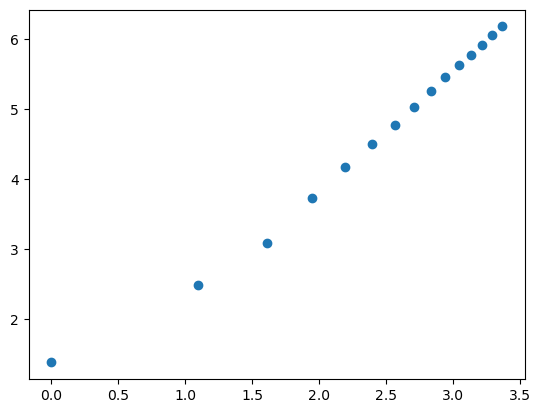

In [270]:
%matplotlib inline
#plt.plot(a_s, n_s, 'o')
plt.plot(np.log(a_s)[:], np.log(n_s)[:], 'o')

In [271]:
reg = LinearRegression().fit(np.log(a_s)[1:].reshape(-1, 1), np.log(n_s)[1:])
print(reg.coef_)

[1.67679395]


Text(0.5, 1.0, 'Hausdorff Fractal Dimension (Multiple Trajectories Walk)')

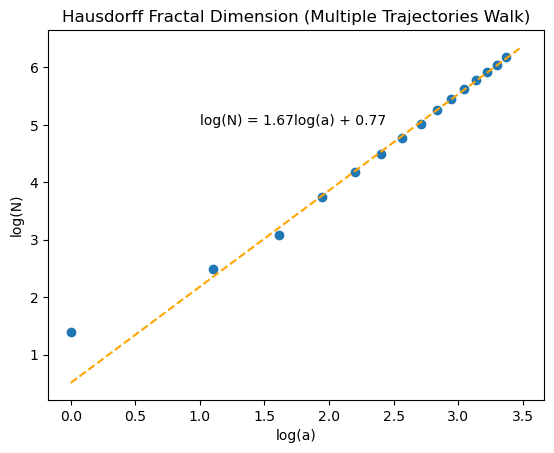

In [272]:
x_test = np.arange(0.0, 3.5, 0.01).reshape(-1, 1)
y_test = reg.predict(x_test)
plt.plot(np.log(a_s)[:], np.log(n_s)[:], 'o')
plt.plot(x_test, y_test, '--', color='orange')
plt.xlabel('log(a)')
plt.ylabel('log(N)')
plt.text(1.0, 5.0, "log(N) = 1.67log(a) + 0.77")
plt.title("Hausdorff Fractal Dimension (Multiple Trajectories Walk)")

In [22]:
set0 = set([(x, y) for (x, y) in walks[0]])
set1 = set([(x, y) for (x, y) in walks[1]])
set2 = set([(x, y) for (x, y) in walks[2]])

In [23]:
set0 & set1 #Evidence for no overlap between walks

{(0.0, 0.0)}

In [24]:
set1 & set2 #Evidence for no overlap between walks

{(0.0, 0.0)}

# Self-avoiding random walk (one walk)

In [209]:
# Function to generate multiple random walks
def generate_random_walks_new(num_walks, steps, dims):
    occupied_points = set((0, 0))
    step_choices = np.array([-1, 0, 1])
    current_xs = [[0] for _ in range(num_walks)]
    current_ys = [[0] for _ in range(num_walks)]
    walks = []
    for i in range(steps):
        can_walk = False
        new_poses_x = []
        new_poses_y = []
        for j in range(num_walks):
            x, y = current_xs[j][i], current_ys[j][i]
            for dx in (-1, 0, 1):
                x_prime = x + dx
                for dy in (-1, 0, 1):
                    y_prime = y + dy 
                    if (x_prime, y_prime) not in occupied_points:
                        can_walk = True
                        break 
            if not can_walk:
                break 
            while True:
                rx = np.random.random()
                ry = np.random.random()

                if rx < 1. / 3:
                    x = x - 1
                elif rx >= 1./3 and rx < 2./3:
                    x = x
                else:
                    x = x + 1


                if ry < 1. / 3:
                    y = y - 1.
                elif ry >= 1./3 and ry < 2./3:
                    y = y
                else:
                    y = y + 1.

                if (x, y) in occupied_points:
                    continue
                else:
                    occupied_points.add((x, y))
                    break 
            current_xs[j].append(x)
            current_ys[j].append(y)
            
        if not can_walk:
            break 
    for i in range(num_walks):
        result = []
        for j in range(len(current_xs[-1])):
            x = current_xs[i][j]
            y = current_ys[i][j]
            result.append([x, y])
        walks.append(np.array(result))
        
    return walks

# Function to generate a color scheme for each walk
def generate_color_schemes(num_walks, steps, base_colors):
    color_schemes = []
    for j in range(num_walks):
        colors = [np.array(base_colors[j]) * (i/steps) for i in range(steps)]
        color_schemes.append([to_hex(color) for color in colors])
    return color_schemes #contains?

# User parameters
num_walks = 1  # Number of simultaneous walks
user_steps = 1000  # Number of steps in each walk
user_dims = 2  # Dimensions (2 for 2D, 3 for 3D)
user_base_colors = [[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 1, 0], [1, 0, 1]]  # Base colors for the walks (red and blue)

# Generate multiple random walks and color schemes
walks = generate_random_walks_new(num_walks, user_steps, user_dims)
color_schemes = generate_color_schemes(num_walks, len(walks[-1]), user_base_colors)

# Plotting the walks
# fig, ax = plt.subplots(figsize=(10, 10))
fig = plt.figure()

metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure(dpi=200)
value = 200
user_steps = 10000
%matplotlib osx
# plt.xlim(-70, 10)
# plt.ylim(-40, 10)
while True:
    walks = generate_random_walks_new(num_walks, user_steps, user_dims)
    color_schemes = generate_color_schemes(num_walks, len(walks[-1]), user_base_colors)
    #print(len(walks[0]))
    if len(walks[0]) > 600:
#         print(len(walks[1]))
        with writer.saving(fig, "testtest.mp4", dpi=200):
            for i in tqdm(range(1, len(walks[-1]))):

                xarray = []
                yarray = []
                color_array = []
                for j in range(num_walks):
                    xarray = np.concatenate((xarray, walks[j][:i, 0]))
                    yarray = np.concatenate((yarray, walks[j][:i, 1]))
                    color_array = np.concatenate((color_array, color_schemes[j][-i:]))

        #             plt.plot(walks[j][:i, 0], walks[j][:i, 1], color=color_schemes[j][i], linewidth=2)
                #plt.scatter(walks[j][:i, 0], walks[j][:i, 1], color=color_schemes[j][:i], s=15.0)
                    # plt.scatter(walks[1][:, 0], walks[1][:, 1], color=color_schemes[1], s=15.0)
                if i % 10 == 0:
                    plt.clf()
                    plt.scatter(xarray, yarray, color=color_array, s=2.0)
                    plt.xlim(-100, 100)
                    plt.ylim(-100, 100)
                    plt.show()
                    plt.draw()
                    plt.pause(0.0005)
                    writer.grab_frame()
                    
        break 

  0%|                                                   | 0/901 [00:00<?, ?it/s]/var/folders/x1/m1tj6llx3fg0hpzl4p8qp0r40000gn/T/ipykernel_5978/1086774316.py:117: UserWarning: Matplotlib is currently using MacOSX, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/var/folders/x1/m1tj6llx3fg0hpzl4p8qp0r40000gn/T/ipykernel_5978/1086774316.py:119: UserWarning: Matplotlib is currently using MacOSX, which is a non-GUI backend, so cannot show the figure.
  plt.pause(0.0005)
100%|█████████████████████████████████████████| 901/901 [00:18<00:00, 48.90it/s]


# Hausdorff calculation

In [218]:
a_s = np.arange(1, 30, 2)
n_s = [hausdorff(a, walks) for a in a_s]

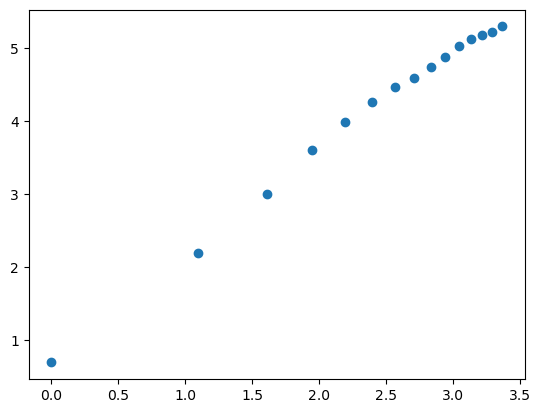

In [219]:
%matplotlib inline
#plt.plot(a_s, n_s, 'o')
plt.plot(np.log(a_s)[:], np.log(n_s)[:], 'o')

In [220]:
reg = LinearRegression().fit(np.log(a_s)[:].reshape(-1, 1), np.log(n_s)[:])
reg.coef_

array([1.38918262])

In [227]:
reg.intercept_

0.7852628224777636

Text(0.5, 1.0, 'Hausdorff Fractal Dimension')

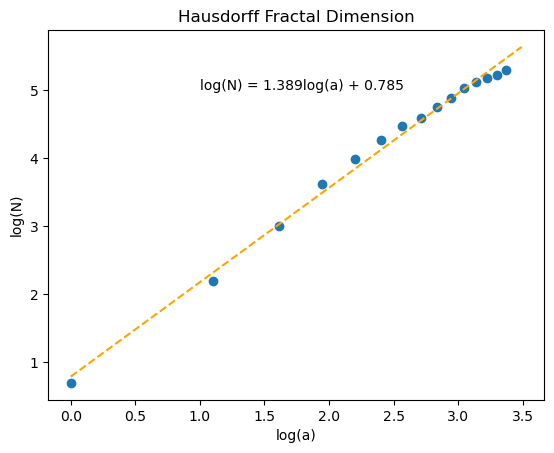

In [228]:
x_test = np.arange(0.0, 3.5, 0.01).reshape(-1, 1)
y_test = reg.predict(x_test)
plt.plot(np.log(a_s)[:], np.log(n_s)[:], 'o')
plt.plot(x_test, y_test, '--', color='orange')
plt.xlabel('log(a)')
plt.ylabel('log(N)')
plt.text(1.0, 5.0, "log(N) = 1.389log(a) + 0.785")
plt.title("Hausdorff Fractal Dimension")